In [1]:
# Load packages and data.

# Packages for data manipulation and data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for data modelling. 
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

%matplotlib inline

loc = r"C:\Users\me\Documents\datasets\diabetes.csv"

df = pd.read_csv(loc)

In [2]:
# Inspect the data set.

df.shape

(768, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# We can see that the data frame is made up of numerical data only. 

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Some takeaways from the data above:
# Around 35% of the patients have diabetes.
# There average age is around 33.
# The bulk of patients are aged between 24 and 41.
# There is a wide diversity in insulin levels.
# The patients have had just under 4 pregnancies on average.

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Check for nulls.

df.apply(lambda x: sum(x.isnull()))

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

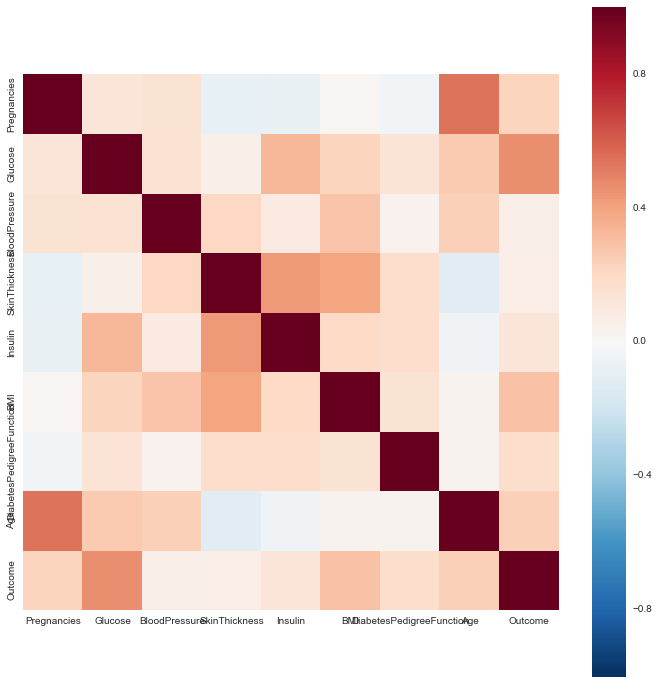

In [7]:
# There are no null values in the data set. We tend to see clean data sets like this on UCI.

# Plot a heatmap using seaborn. 

corr = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [8]:
# The heatmap shows that all of the variables have some degree of correlation
# with the target variable 'outcome'. The variable with the strongest correlation
# is glucose. We can also see that there is correlation between the variables.
# Some of these make intuitive sense e.g pregnancies and age.

In [9]:
# Show precise correlations with the target variable.

cor_dict = corr['Outcome'].to_dict()
del cor_dict['Outcome']
print("List the numerical features decendingly by their correlation with Outcome:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Outcome:

Glucose: 	0.4665813983068757
BMI: 	0.29269466264444666
Age: 	0.23835598302719743
Pregnancies: 	0.2218981530339883
DiabetesPedigreeFunction: 	0.17384406565296076
Insulin: 	0.13054795488404808
SkinThickness: 	0.07475223191831948
BloodPressure: 	0.06506835955033308


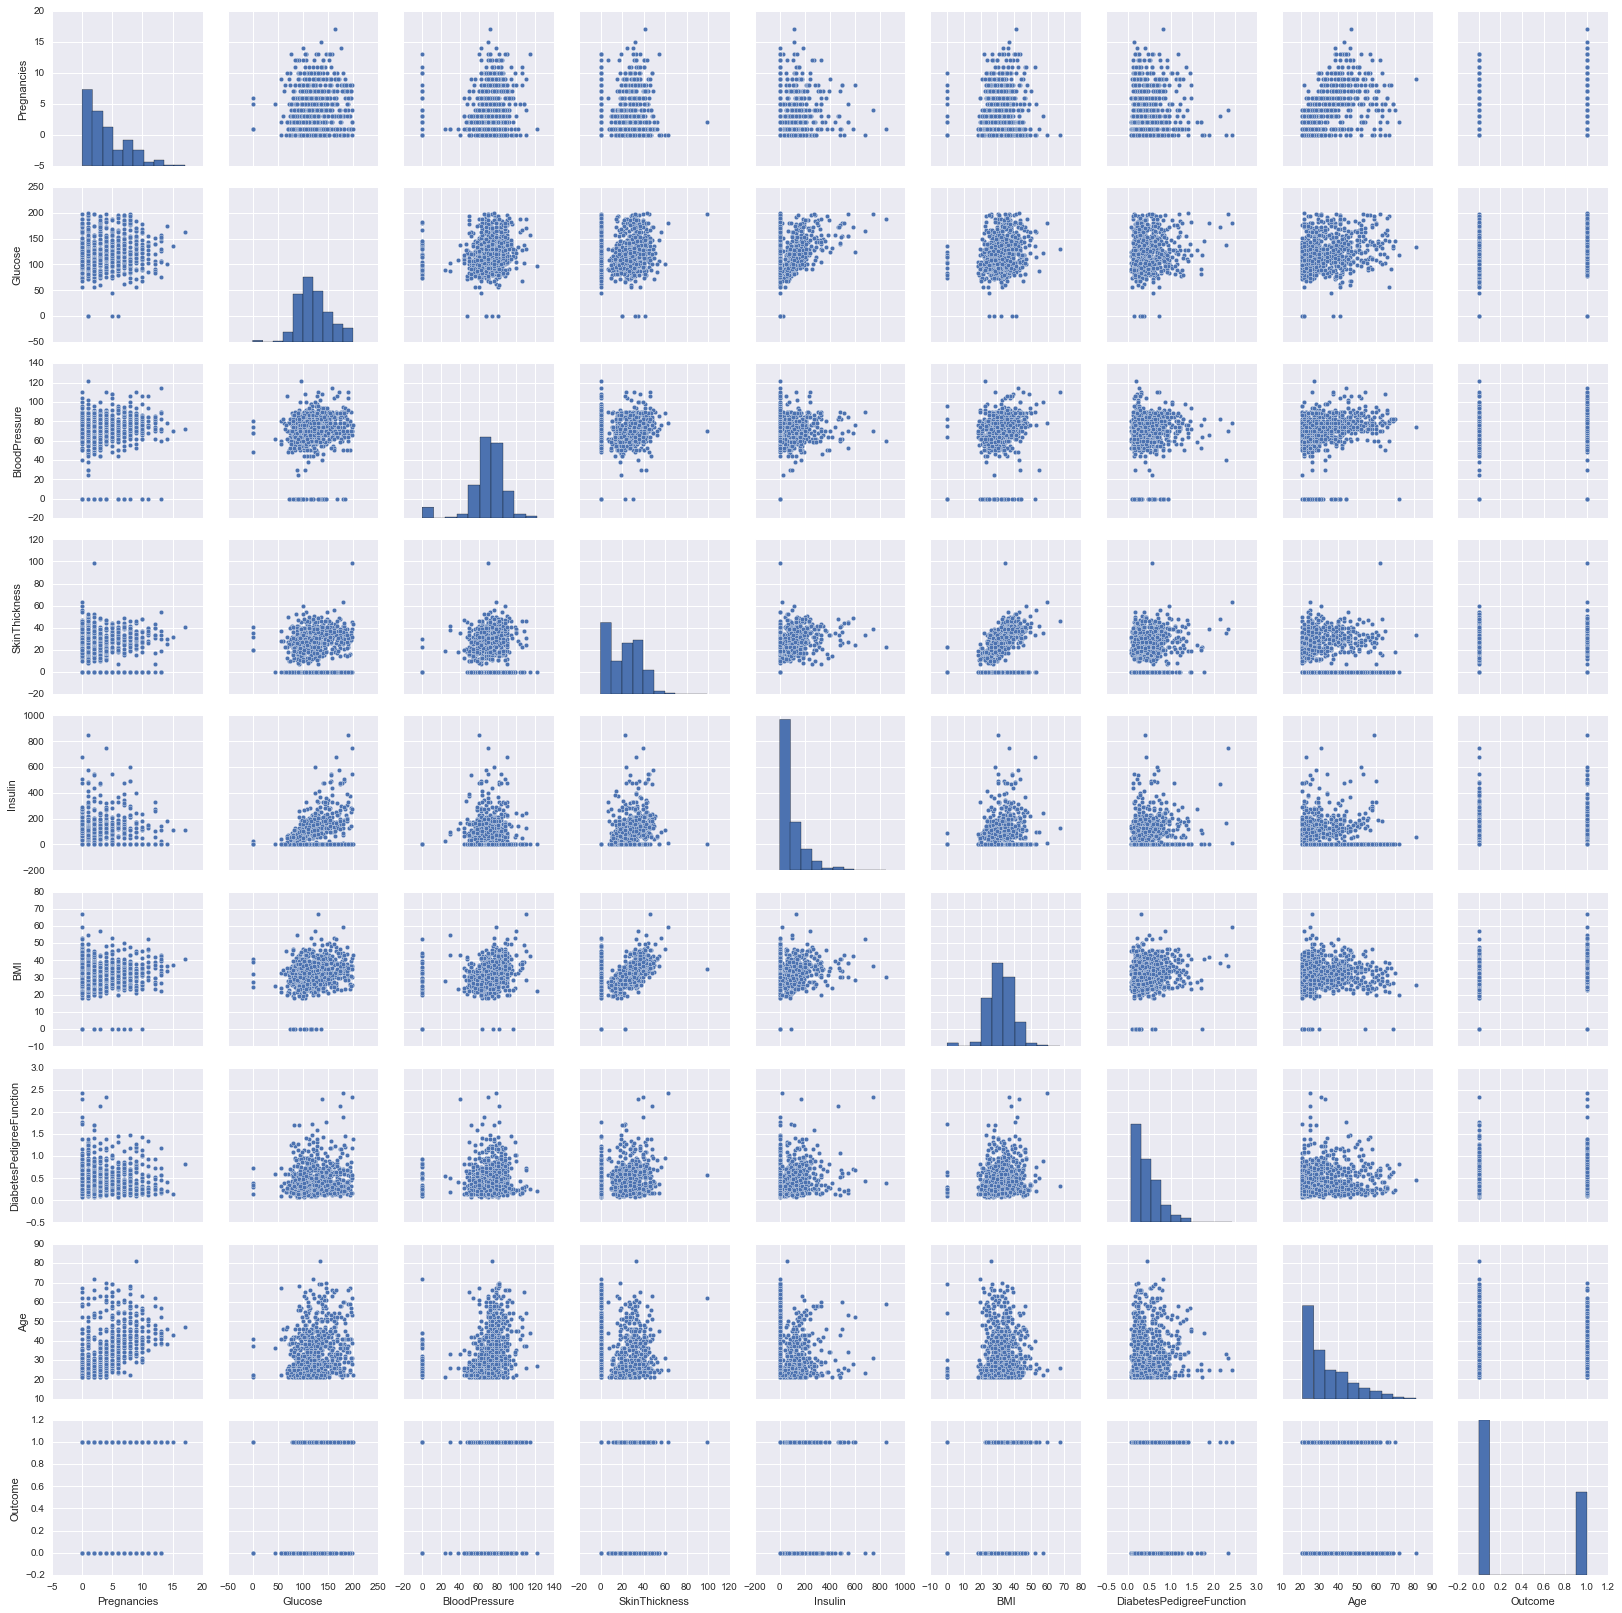

In [10]:
# Plot a pairplot using seaborn.

sns.pairplot(df)

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


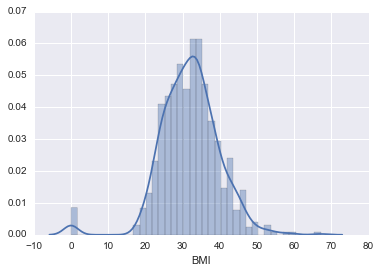

In [11]:
sns.distplot(df.BMI, bins=40) 

In [12]:
# BMI guide

#under 18.5 - underweight
#18.5 to 25 - healthy
#25 to 30 - overweight
#over 30 - obese

# Most people in the data set are overweight or obese. Worryingly there are even people with
# very low BMIs (this could be an error with caused during data entry).

In [13]:
# Let's make our data ready for modelling. 

# Separate the target and features.
target = df.Outcome
features = df.drop('Outcome', axis=1)

# The column names will be used later to help us make sense of the models.
cols = features.columns.values

In [14]:
# Standardize features by removing the mean and scaling to unit variance.
standard_scaler = StandardScaler()
features = standard_scaler.fit_transform(features)

In [25]:
# Split the data up in train and test sets using Sklearn's train_test_split module.

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [16]:
# Create a function for running logisitic regression on the data. 
# Use grid search to find optimal hyperparameters.
# The reason we have to use a function is due to the way Python uses parallelization on Windows.
# http://tinyurl.com/h3g3m8m
# For more info on Sklearn's logisitc regression function please visit the link below.
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

def log_reg_model(X_train, X_test, y_train, y_test):
    if __name__ == '__main__':

        param_grid = {'penalty' : ['l1', 'l2'],
                      'C' : [0.001, 0.01, 0.1, 1, 10]}

        classifier = GridSearchCV(estimator=LogisticRegression(),
                                  param_grid=param_grid,
                                  n_jobs=-1,
                                  cv=3)

        classifier.fit(X_train, y_train)

        best_params = classifier.best_params_

        print('Best parameters: ', best_params)

        validation_accuarcy = classifier.score(X_test, y_test)
        
        print('Validation accuracy: ', validation_accuarcy)

        coefficients = classifier.best_estimator_.coef_
        print('Coefficients: ', list(zip(cols, coefficients[0])))

In [26]:
#Find model with best paramters.

log_reg_model(X_train, X_test, y_train, y_test)

Best parameters:  {'penalty': 'l2', 'C': 0.1}
Validation accuracy:  0.760416666667
Coefficients:  [('Pregnancies', 0.28408993163160268), ('Glucose', 0.98235923705215222), ('BloodPressure', -0.18800303007688698), ('SkinThickness', -0.083044342724820475), ('Insulin', -0.043600274455521934), ('BMI', 0.60932491044477732), ('DiabetesPedigreeFunction', 0.21623230003534752), ('Age', 0.22955997978389875)]


In [ ]:
# Results from 5 runs of the model.

'''
1st run: Best parameters:  {'penalty': 'l1', 'C': 1}
         Validation accuracy:  0.776041666667
    
2nd run: Best parameters:  {'penalty': 'l1', 'C': 1}
         Validation accuracy:  0.734375
    
3rd run: Best parameters:  {'penalty': 'l1', 'C': 0.1}
         Validation accuracy:  0.78125
    
4th run: Best parameters:  {'penalty': 'l2', 'C': 1}
         Validation accuracy:  0.791666666667
    
5th run: Best parameters:  {'penalty': 'l2', 'C': 0.1}
         Validation accuracy:  0.760416666667
'''

In [27]:
avg_val_accuarcy = ((0.776 + 0.734 + 0.781 + 0.791 + 0.76) / 5) * 100
print('average validation accuracy: ',
      round(avg_val_accuarcy,2), '%')


average validation accuracy:  76.84 %


In [ ]:
# Let's see if using Linear SVC will provide a better model for our data.
# For more info on Linear SVC in Sklearn please see the link below.
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

def svc_model(X_train, X_test, y_train, y_test):
    if __name__ == '__main__':

        param_grid = {'C':[0.001, 0.01, 0.1, 1.0],
                      'class_weight':[None, 'balanced']}

        classifier = GridSearchCV(estimator=LinearSVC(),
                                  param_grid=param_grid,
                                  n_jobs=-1,
                                  cv=3)

        classifier.fit(X_train, y_train)

        best_params = classifier.best_params_

        print('Best parameters: ', best_params)

        validation_accuarcy = classifier.score(X_test, y_test)
        
        print('Validation accuracy: ', validation_accuarcy)

        coefficients = classifier.best_estimator_.coef_
        print('Coefficients: ', list(zip(cols, coefficients[0])))

In [ ]:
# Results from 5 runs of the model.

'''
1st run: Best parameters:  {'C': 0.1, 'class_weight': None}
         Validation accuracy:  0.796875
        
2nd run: Best parameters:  {'class_weight': None, 'C': 0.01}
         Validation accuracy:  0.713541666667

3rd run: Best parameters:  {'class_weight': None, 'C': 0.1}
         Validation accuracy:  0.802083333333

4th run: Best parameters:  {'class_weight': None, 'C': 0.1}
         Validation accuracy:  0.760416666667

5th run: Best parameters:  {'class_weight': None, 'C': 0.001}
         Validation accuracy:  0.734375
'''

In [28]:
avg_val_accuarcy = ((0.797 + 0.714 + 0.802 + 0.76 + 0.734) / 5) * 100
print('average validation accuracy: ',
      round(avg_val_accuarcy,2), '%')

average validation accuracy:  76.14 %


In [ ]:
# We see a similar performance to logisitc regression. Next up it's a gradient boosting ensemble
# algorithm: Gradient Boosting Classifier.

# Note numerous different values were used in the param_grid to hone in on the best paramater
# combinations. The param grid below is what I ended up with after running the model several 
# times.

def gradient_boosting_model(X_train, X_test, y_train, y_test):
    if __name__ == '__main__':

        param_grid = {'learning_rate': [0.015, 0.013, 0.011],
                      'max_depth': [20, 25, None],
                      'min_samples_leaf': [9, 10, 11],
                      'max_features': [0.25, 0.27, 0.3],
                      'n_estimators': [225, 250, 235]} 

        classifier = GridSearchCV(estimator=GradientBoostingClassifier(),
                                  param_grid=param_grid,
                                  n_jobs=-1,
                                  cv=5)

        classifier.fit(X_train, y_train)

        best_params = classifier.best_params_

        print('Best parameters: ', best_params)

        validation_accuarcy = classifier.score(X_test, y_test)
        
        print('Validation accuracy: ', validation_accuarcy)

        feature_importances = classifier.best_estimator_.feature_importances_
        
        print('Feature importances: ', feature_importances)

In [ ]:
# Results from 5 runs of the model.

'''
1st run: Validation accuracy:  0.776
         Best Parameters: {'max_depth': 20, 'min_samples_leaf': 9,
         'n_estimators': 250, 'max_features': 0.25, 'learning_rate': 0.011}
        
2nd run: Validation accuracy:  0.776
         Best Paramaters: {'learning_rate': 0.011, 'min_samples_leaf': 9,
                 'n_estimators': 225, 'max_features': 0.25, 'max_depth': None}

3rd run: Validation accuracy:  0.781
         Best Parameters: {'max_depth': 20, 'min_samples_leaf': 11, 'n_estimators': 250,
                 'max_features': 0.27, 'learning_rate': 0.013}

4th run: Validation accuracy:  0.781
         Best Parameters: {'max_depth': 20, 'n_estimators': 225, 'max_features': 0.3,
                'min_samples_leaf': 9, 'learning_rate': 0.011}

5th run: Validation accuracy:  0.786
         Best Parameters: {'learning_rate': 0.015, 'max_depth': 20,
              'n_estimators': 250,'min_samples_leaf': 11, 'max_features': 0.3}
'''

In [29]:
avg_val_accuarcy = ((0.776 + 0.7776 + 0.781 + 0.781 + 0.786) / 5) * 100
print('average validation accuracy: ',
      round(avg_val_accuarcy,2), '%')

average validation accuracy:  78.03 %


In [ ]:
# The more complex model marginally improved the accuracy on the validation set.